In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm   
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm 
pd.set_option('display.max_columns', 500)

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso   
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae   
from sklearn.metrics import r2_score  
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Reading data

In [5]:
df = pd.read_csv('C:\\Users\\singh\\Documents\\ML projects\\listings_summary_A.csv') 
df.head(5)    

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-1

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [7]:
columns_to_keep = ['id','host_has_profile_pic','host_since','neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                   'host_is_superhost','description',
                   'latitude', 'longitude','is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'price', 'cleaning_fee',
                   'review_scores_rating','reviews_per_month','number_of_reviews',
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                   'review_scores_communication','review_scores_location','review_scores_value',
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy','availability_365']


df = df[columns_to_keep].set_index('id') 
df.head(2)

,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,t,2008-08-18,Brunnenstr. Süd,Mitte,t,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$30.00,93.0,3.76,118,10.0,9.0,10.0,10.0,10.0,9.0,$200.00,$28.00,1,4,f,f,strict_14_with_grace_period,141
2695,t,2008-09-16,Prenzlauer Berg Nordwest,Pankow,f,In the summertime we are spending most of our ...,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,100.0,1.42,6,10.0,10.0,10.0,10.0,10.0,10.0,$0.00,$0.00,1,2,f,f,flexible,0


In [8]:
df.shape

(22552, 35)

In [9]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 2015 to 29867352
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_has_profile_pic          22526 non-null  object 
 1   host_since                    22526 non-null  object 
 2   neighbourhood_cleansed        22552 non-null  object 
 3   neighbourhood_group_cleansed  22552 non-null  object 
 4   host_is_superhost             22526 non-null  object 
 5   description                   22349 non-null  object 
 6   latitude                      22552 non-null  float64
 7   longitude                     22552 non-null  float64
 8   is_location_exact             22552 non-null  object 
 9   property_type                 22552 non-null  object 
 10  room_type                     22552 non-null  object 
 11  accommodates                  22552 non-null  int64  
 12  bathrooms                     22520 non-null  float64


# Null Values
### Inspection + Handling

In [10]:
df.isnull().sum()    

host_has_profile_pic              26
host_since                        26
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
host_is_superhost                 26
description                      203
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         32
bedrooms                          18
bed_type                           0
amenities                          0
price                              0
cleaning_fee                    7146
review_scores_rating            4389
reviews_per_month               3914
number_of_reviews                  0
review_scores_accuracy          4414
review_scores_cleanliness       4411
review_scores_checkin           4432
review_scores_communication     4418
review_scores_location          4431
review_scores_value             4435
s

In [11]:
df["review_scores_value"].value_counts()

10.0    10020
9.0      6376
8.0      1306
6.0       181
7.0       161
4.0        36
2.0        23
5.0        12
3.0         2
Name: review_scores_value, dtype: int64

# f/t to int

In [12]:
df['is_location_exact'] = df['is_location_exact'].map({'f':0,'t':1})   
df['host_is_superhost'] = df['host_is_superhost'].map({'f':0,'t':1})
df['is_business_travel_ready'] = df['is_business_travel_ready'].map({'f':0,'t':1})
df['instant_bookable'] = df['instant_bookable'].map({'f':0,'t':1})

In [13]:
df.head(3)

,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,t,2008-08-18,Brunnenstr. Süd,Mitte,1.0,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$30.00,93.0,3.76,118,10.0,9.0,10.0,10.0,10.0,9.0,$200.00,$28.00,1,4,0,0,strict_14_with_grace_period,141
2695,t,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,In the summertime we are spending most of our ...,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,100.0,1.42,6,10.0,10.0,10.0,10.0,10.0,10.0,$0.00,$0.00,1,2,0,0,flexible,0
3176,t,2008-10-19,Prenzlauer Berg Südwest,Pankow,0.0,This beautiful first floor apartment is situa...,52.534996,13.417579,1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,$50.00,92.0,1.25,143,9.0,9.0,9.0,9.0,10.0,9.0,$200.00,$20.00,2,62,1,0,strict_14_with_grace_period,220


# Profile Pics

In [14]:
df['host_has_profile_pic'].unique()
df['host_has_profile_pic'].nunique()  
df['host_has_profile_pic'].value_counts(dropna=False)   

t      22470
f         56
NaN       26
Name: host_has_profile_pic, dtype: int64

In [15]:
df['host_has_profile_pic'].fillna('f',inplace=True)  

<AxesSubplot:xlabel='host_has_profile_pic', ylabel='count'>

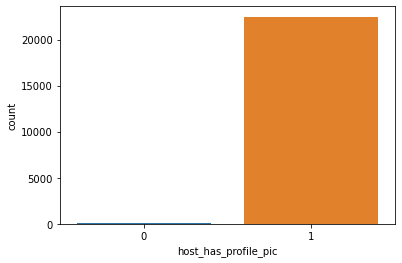

In [16]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'f':0,'t':1})
sns.countplot(x='host_has_profile_pic',data=df)

In [17]:
df['host_has_profile_pic'].value_counts()

1    22470
0       82
Name: host_has_profile_pic, dtype: int64

# Price

In [18]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)  
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)
df['security_deposit'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
df['extra_people'] = df['extra_people'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\singh\AppData\Local\Temp\ipykernel_5776\732676128.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\singh\AppData\Local\Temp\ipykernel_5776\732676128.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\singh\AppData\Local\Temp\ipykernel_5776\732676128.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['security_de

<AxesSubplot:xlabel='cleaning_fee', ylabel='count'>

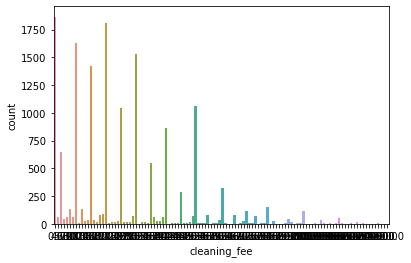

In [19]:
df['cleaning_fee'].value_counts(dropna=False)

sns.countplot(x='cleaning_fee',data=df)

In [20]:
df['cleaning_fee'].fillna(df['cleaning_fee'].mean(), inplace=True)
df['cleaning_fee'].isna().sum()

0

In [21]:
df['security_deposit'].fillna(df['security_deposit'].mean(), inplace=True)
df['security_deposit'].isna().sum()

0

In [22]:
df['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [23]:
len(df[df['price']==0])
to_drop = list(df[df['price']==0].index)

In [24]:
df.drop(to_drop, inplace=True)
df.reset_index(inplace=True)
df['price'] = np.log1p(df['price'])  

In [25]:
len(df[df['price']==0])

0

(array([1.0000e+00, 2.6000e+01, 2.0380e+03, 1.2248e+04, 6.9970e+03,
        1.0720e+03, 1.1100e+02, 1.7000e+01, 8.0000e+00, 2.6000e+01]),
 array([0.69314718, 1.53434156, 2.37553594, 3.21673031, 4.05792469,
        4.89911907, 5.74031345, 6.58150783, 7.42270221, 8.26389658,
        9.10509096]),
 <BarContainer object of 10 artists>)

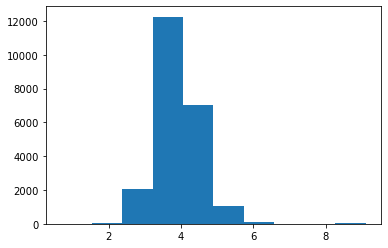

In [26]:
plt.hist(df['price'])   

In [27]:
df['price'].value_counts()

3.433987    1387
3.583519    1256
3.931826    1247
3.713572    1191
3.258097    1121
            ... 
5.572154       1
5.802118       1
6.045005       1
6.098074       1
7.313887       1
Name: price, Length: 294, dtype: int64

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.149665
Kurtosis: 5.184078


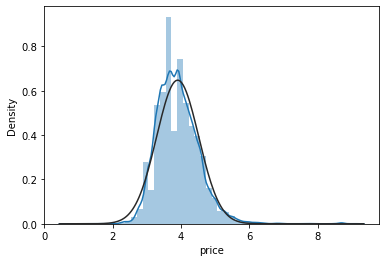

<Figure size 432x288 with 0 Axes>

In [28]:
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())    

# Room Types

<AxesSubplot:xlabel='room_type', ylabel='count'>

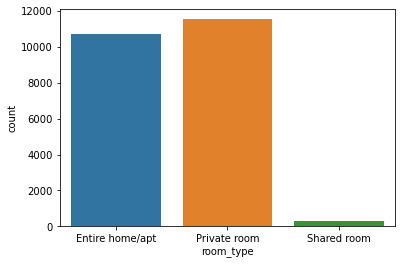

In [29]:
sns.countplot(x='room_type',data=df)

# Neighbourhood Group

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

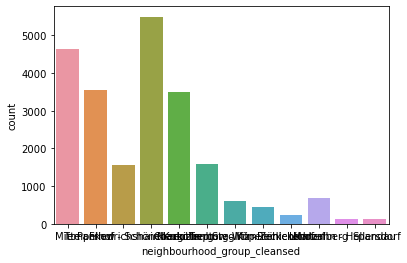

In [30]:
sns.countplot(x='neighbourhood_group_cleansed',data=df)

# Neighbourhood

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='count'>

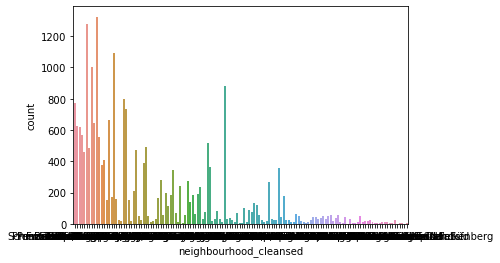

In [31]:
sns.countplot(x='neighbourhood_cleansed',data=df)

In [32]:
z = df['neighbourhood_cleansed'].value_counts() 

In [33]:
print(z)

Tempelhofer Vorstadt                  1324
Frankfurter Allee Süd FK              1280
Alexanderplatz                        1091
Reuterstraße                          1002
Rixdorf                                880
                                      ... 
Malchow, Wartenberg und Falkenberg       3
Allende-Viertel                          3
Neu-Hohenschönhausen Süd                 2
MV 2                                     1
Hellersdorf-Ost                          1
Name: neighbourhood_cleansed, Length: 136, dtype: int64


In [34]:
others = []
for i in set(df['neighbourhood_cleansed']):
    if z[i]<100:
        others.append(i)
len(others)

90

In [35]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:   
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|█████████████████████████████████████████████████████████████████████████| 22544/22544 [00:00<00:00, 24718.19it/s]


In [36]:
len(df['neighbourhood_cleansed'].value_counts())

47

## Propery Type

In [37]:
z = df['property_type'].value_counts()

In [38]:
others = []
for i in set(df['property_type']):
    if z[i]<100:
        others.append(i)
len(others)

27

In [39]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|█████████████████████████████████████████████████████████████████████████| 22544/22544 [00:00<00:00, 64818.59it/s]


In [40]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|█████████████████████████████████████████████████████████████████████████| 22544/22544 [00:00<00:00, 65006.24it/s]


# Bathrooms

In [41]:
df['bathrooms'].value_counts(dropna=False)

1.0    19801
2.0     1268
1.5     1145
0.5      104
2.5       74
3.0       50
0.0       41
NaN       32
4.0       12
3.5        3
7.0        3
8.5        3
5.0        2
7.5        2
8.0        2
4.5        1
6.0        1
Name: bathrooms, dtype: int64

In [42]:
df['bathrooms'].fillna(1,inplace=True)

# Bedroom

In [43]:
df['bedrooms'].value_counts()

1.0     17159
2.0      2970
0.0      1477
3.0       723
4.0       143
5.0        34
6.0        10
8.0         4
7.0         3
10.0        1
12.0        1
9.0         1
Name: bedrooms, dtype: int64

In [44]:
df['bedrooms'].fillna(1,inplace=True)

# Host Details

In [45]:
z = df['host_since'].isnull()
z = list(df[z].index)           

df.drop(z,inplace=True)
df.reset_index(inplace=True)

z = df['host_is_superhost'].isnull()
z = list(df[z].index)

df.drop(z,inplace=True)
df.reset_index(inplace=True)


# Reviews

In [46]:
dropped = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location','review_scores_value']
df.drop(dropped,axis=1,inplace=True)   

In [47]:
df.head()

,level_0,index,id,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,reviews_per_month,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
0,0,0,2015,1,2008-08-18,Brunnenstr. Süd,Mitte,1.0,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4.110874,30.0,3.76,118,200.0,28.0,1,4,0,0,strict_14_with_grace_period,141
1,1,1,2695,1,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,In the summertime we are spending most of our ...,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2.890372,0.0,1.42,6,0.0,0.0,1,2,0,0,flexible,0
2,2,2,3176,1,2008-10-19,Prenzlauer Berg Südwest,Pankow,0.0,This beautiful first floor apartment is situa...,52.534996,13.417579,1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",4.510860,50.0,1.25,143,200.0,20.0,2,62,1,0,strict_14_with_grace_period,220
3,3,3,3309,1,2008-11-07,Schöneberg-Nord,Tempelhof - Schöneberg,0.0,First of all: I prefer short-notice bookings. ...,52.498855,13.349065,1,Apartment,Private room,2,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",3.295837,30.0,0.39,25,250.0,18.0,1,5,0,0,strict_14_with_grace_period,297
4,4,4,7071,1,2009-05-16,Helmholtzplatz,Pankow,1.0,Cozy and large room in the beautiful district ...,52.543157,13.415091,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",3.761200,0.0,1.75,197,0.0,24.0,1,2,0,0,moderate,26


# Cancellation

In [48]:
df['cancellation_policy'].value_counts(dropna=False)

flexible                       9082
moderate                       7086
strict_14_with_grace_period    6283
super_strict_30                  53
super_strict_60                  14
Name: cancellation_policy, dtype: int64

# Dropping features

In [49]:
y = df['price']
df.drop(['price'],axis=1,inplace=True)    

In [50]:
df.isnull().sum()   #this tells you which column has how many null vvalues

level_0                            0
index                              0
id                                 0
host_has_profile_pic               0
host_since                         0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
host_is_superhost                  0
description                      203
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
bed_type                           0
amenities                          0
cleaning_fee                       0
reviews_per_month               3901
number_of_reviews                  0
security_deposit                   0
extra_people                       0
guests_included                    0
minimum_nights                     0
instant_bookable                   0
i

## Size estimation

In [51]:
df['description']

0        Great location!  30 of 75 sq meters. This wood...
1        In the summertime we are spending most of our ...
2        This beautiful first floor apartment  is situa...
3        First of all: I prefer short-notice bookings. ...
4        Cozy and large room in the beautiful district ...
                               ...                        
22513    Charming apartment right in the center of Berl...
22514    Die Wohnung liegt in unmittelbarer Nähe zum Vi...
22515    Prenzlauer Berg is one of the most creative di...
22516    The double rooms with private shower / WC are ...
22517    Sunny, modern and cozy 3-bedroom shared flat i...
Name: description, Length: 22518, dtype: object

In [52]:
df['size'] = df['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)        #string preprocessing,  # took size from description
df['size'] = df['size'].str.replace("\D", "")   # modified/cleaned the size obtained
df['size'] = df['size'].astype(float)   # changed it to float because it was string


C:\Users\singh\AppData\Local\Temp\ipykernel_5776\3613653842.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['size'] = df['size'].str.replace("\D", "")   # modified/cleaned the size obtained


In [53]:
df['size'].value_counts(dropna=False)

NaN      11778
10.0      2331
15.0      1263
20.0       857
30.0       444
         ...  
144.0        1
688.0        1
147.0        1
126.0        1
240.0        1
Name: size, Length: 219, dtype: int64

In [54]:
cols = ['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'size']

sub_df = df[cols]

df.drop(cols,inplace=True, axis=1)

In [55]:
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

y_train = train_data['size']

In [56]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [57]:
y_test = linreg.predict(X_test)

In [58]:
mse(y_train,linreg.predict(X_train)),r2_score(y_train,linreg.predict(X_train))    # mse= mean square error. mean of square of errors. the less it is, the better results are
# mse shouls be less and r2_score should be aound 1.. both re reverse which means model is bad


(13101.20952169146, 0.026865995167252188)

In [59]:
y_test = pd.DataFrame(y_test)   # made y_test a dataframe
y_test.columns = ['size'] # named it as size.

In [60]:
prelim_index = pd.DataFrame(X_test.index)
prelim_index.columns = ['prelim']

y_test = pd.concat([y_test, prelim_index], axis=1)
y_test.set_index(['prelim'], inplace=True)

In [61]:
new_test_data = pd.concat([X_test, y_test], axis=1)
sub_df_new = pd.concat([new_test_data, train_data], axis=0)
df = pd.concat([sub_df_new, df], axis=1)

In [62]:
sub_df_new.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'security_deposit', 'extra_people', 'guests_included', 'size'],
      dtype='object')

In [63]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,size,level_0,index,id,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,reviews_per_month,number_of_reviews,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
6,2,1.0,0.0,0.000000,500.0,0.0,1,41.121131,6,6,14325,1,2009-11-18,Prenzlauer Berg Nordwest,Pankow,0.0,The apartment is located on the upper second f...,52.547846,13.405562,1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",0.23,23,90,0,0,strict_14_with_grace_period,129
11,4,1.0,2.0,49.000000,500.0,24.0,2,84.994207,11,11,20858,1,2010-01-18,Prenzlauer Berg Südwest,Pankow,0.0,Bright and sunny condo with two balconies in a...,52.536952,13.407615,1,Loft,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,Elevator,""Indoor fireplace"",H...",0.75,56,3,0,0,strict_14_with_grace_period,166
12,4,1.0,1.0,40.000000,500.0,18.0,2,76.752237,12,12,21869,1,2009-12-20,nördliche Luisenstadt,Friedrichshain-Kreuzberg,0.0,Light and sunny 1-Room-turn of the century-fla...,52.502733,13.434620,1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",0.61,60,60,0,0,strict_14_with_grace_period,129
13,4,1.0,2.0,50.000000,300.0,25.0,2,85.300957,13,13,22415,1,2010-02-27,südliche Luisenstadt,Friedrichshain-Kreuzberg,1.0,Very nice furnished 2 bedroom apartment for su...,52.494851,13.428501,1,Apartment,Entire home/apt,Real Bed,"{""Cable TV"",Internet,Wifi,Kitchen,""Pets allowe...",0.59,61,3,0,0,strict_14_with_grace_period,257
19,2,1.0,0.0,26.721018,1660.0,0.0,1,51.259737,19,19,28156,1,2009-11-18,Prenzlauer Berg Nordwest,Pankow,0.0,The apartment is located on the upper ground f...,52.546719,13.405117,1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",0.29,28,90,0,0,strict_14_with_grace_period,191


In [64]:
dropped = ['index','id','level_0','description']
df.drop(dropped,axis=1,inplace=True)


In [65]:
df.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'security_deposit', 'extra_people', 'guests_included', 'size',
       'host_has_profile_pic', 'host_since', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'host_is_superhost', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'reviews_per_month', 'number_of_reviews',
       'minimum_nights', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'availability_365'],
      dtype='object')

# Data processing

In [66]:
df.amenities

6        {TV,Internet,Wifi,Kitchen,"Buzzer/wireless int...
11       {TV,Wifi,Kitchen,Elevator,"Indoor fireplace",H...
12       {TV,Internet,Wifi,Kitchen,"Buzzer/wireless int...
13       {"Cable TV",Internet,Wifi,Kitchen,"Pets allowe...
19       {TV,Internet,Wifi,Kitchen,"Buzzer/wireless int...
                               ...                        
22490    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
22494    {Wifi,Kitchen,Heating,Washer,Dryer,Essentials,...
22496    {TV,Wifi,Kitchen,"Free street parking","Hot tu...
22507    {Wifi,Kitchen,"Smoking allowed",Heating,Washer...
22510    {Wifi,Kitchen,Elevator,Heating,Washer,"Smoke d...
Name: amenities, Length: 22518, dtype: object

In [67]:
for i in tqdm(range(len(df))):
    df.loc[i,'No_of_amentities'] = len(df.loc[i,'amenities'].split(','))

100%|██████████████████████████████████████████████████████████████████████████| 22518/22518 [00:02<00:00, 8060.85it/s]


In [68]:
df['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df['TV'] = df['amenities'].str.contains('TV')
df['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')
df['Host_greets_you'] = df['amenities'].str.contains('Host greets you')
df['Smoking_allowed'] = df['amenities'].str.contains('Smoking allowed')
df['Hot_water'] = df['amenities'].str.contains('Hot water')
df['Fridge'] = df['amenities'].str.contains('Refrigerator')


In [69]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,size,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,reviews_per_month,number_of_reviews,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365,No_of_amentities,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge
6,2,1.0,0.0,0.000000,500.0,0.0,1,41.121131,1,2009-11-18,Prenzlauer Berg Nordwest,Pankow,0.0,52.547846,13.405562,1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",0.23,23,90,0,0,strict_14_with_grace_period,129,13.0,False,True,False,True,False,True,False
11,4,1.0,2.0,49.000000,500.0,24.0,2,84.994207,1,2010-01-18,Prenzlauer Berg Südwest,Pankow,0.0,52.536952,13.407615,1,Loft,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,Elevator,""Indoor fireplace"",H...",0.75,56,3,0,0,strict_14_with_grace_period,166,17.0,False,True,True,False,False,True,False
12,4,1.0,1.0,40.000000,500.0,18.0,2,76.752237,1,2009-12-20,nördliche Luisenstadt,Friedrichshain-Kreuzberg,0.0,52.502733,13.434620,1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",0.61,60,60,0,0,strict_14_with_grace_period,129,19.0,True,True,True,False,False,False,False
13,4,1.0,2.0,50.000000,300.0,25.0,2,85.300957,1,2010-02-27,südliche Luisenstadt,Friedrichshain-Kreuzberg,1.0,52.494851,13.428501,1,Apartment,Entire home/apt,Real Bed,"{""Cable TV"",Internet,Wifi,Kitchen,""Pets allowe...",0.59,61,3,0,0,strict_14_with_grace_period,257,17.0,True,True,True,True,False,True,False
19,2,1.0,0.0,26.721018,1660.0,0.0,1,51.259737,1,2009-11-18,Prenzlauer Berg Nordwest,Pankow,0.0,52.546719,13.405117,1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",0.29,28,90,0,0,strict_14_with_grace_period,191,13.0,False,True,False,True,False,True,False


In [70]:
dropped = ['amenities']
df.drop(dropped,axis=1,inplace=True)

In [71]:
category = ['neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type',
           'bed_type','cancellation_policy']

for i in category:
    df[i] = df[i].astype('category')



In [72]:
# for i in category:
#     df[i] = df[i].cat.codes

# # df['room_type'] = df['room_type'].cat.codes
# # df['neighbourhood'] = df['neighbourhood'].cat.codes
# # df['neighbourhood_group'] = df['neighbourhood_group'].cat.codes

# Feature Engineering

### Duration

In [73]:
df.host_since.isnull().sum()
df.host_since.value_counts()

2017-02-20    51
2013-08-19    51
2015-06-01    41
2016-01-21    34
2016-02-19    34
              ..
2010-06-12     1
2010-06-27     1
2012-01-21     1
2010-07-06     1
2010-07-22     1
Name: host_since, Length: 2914, dtype: int64

In [74]:
from dateutil import parser

def diff_date(row):
    today = parser.parse('2021-11-22')
    return ((today - parser.parse(row['host_since'])).days)/365


In [75]:
df['host_since'] = df.apply(diff_date,axis=1)   # .apply is used to apply something on the entire dataset
df['host_since'].describe()

count    22518.000000
mean         6.732793
std          1.910952
min          3.046575
25%          5.380822
50%          6.575342
75%          8.106849
max         13.271233
Name: host_since, dtype: float64

### Distances

In [76]:
from math import sin, cos, sqrt, atan2, radians
def haversine_distance_central(row):
    berlin_lat,berlin_long = radians(52.5200), radians(13.4050)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [77]:
def haversine_distance_airport(row):
    berlin_lat,berlin_long = radians(52.3733), radians(13.5064)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [78]:
def haversine_distance_rail(row):
    berlin_lat,berlin_long = radians(52.5073), radians(13.3324)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [79]:
df['distance_central'] = df.apply(haversine_distance_central,axis=1)
df['distance_airport'] = df.apply(haversine_distance_airport,axis=1)
df['distance_railways'] = df.apply(haversine_distance_airport,axis=1)
df['distance_avg'] = ( df['distance_central'] + df['distance_airport'] + df['distance_railways'] )/3.0

In [80]:
df['distance_avg'].describe()

count    22518.000000
mean        12.906814
std          2.477341
min          7.061769
25%         10.997052
50%         12.419055
75%         14.433595
max         28.173038
Name: distance_avg, dtype: float64

In [81]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,size,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,latitude,longitude,is_location_exact,property_type,room_type,bed_type,reviews_per_month,number_of_reviews,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365,No_of_amentities,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,distance_central,distance_airport,distance_railways,distance_avg
6,2,1.0,0.0,0.000000,500.0,0.0,1,41.121131,1,12.019178,Prenzlauer Berg Nordwest,Pankow,0.0,52.547846,13.405562,1,Apartment,Entire home/apt,Real Bed,0.23,23,90,0,0,strict_14_with_grace_period,129,13.0,False,True,False,True,False,True,False,3.097585,20.582463,20.582463,14.754170
11,4,1.0,2.0,49.000000,500.0,24.0,2,84.994207,1,11.852055,Prenzlauer Berg Südwest,Pankow,0.0,52.536952,13.407615,1,Loft,Entire home/apt,Real Bed,0.75,56,3,0,0,strict_14_with_grace_period,166,17.0,False,True,True,False,False,True,False,1.893901,19.395460,19.395460,13.561607
12,4,1.0,1.0,40.000000,500.0,18.0,2,76.752237,1,11.931507,nördliche Luisenstadt,Friedrichshain-Kreuzberg,0.0,52.502733,13.434620,1,Apartment,Entire home/apt,Real Bed,0.61,60,60,0,0,strict_14_with_grace_period,129,19.0,True,True,True,False,False,False,False,2.776520,15.197347,15.197347,11.057072
13,4,1.0,2.0,50.000000,300.0,25.0,2,85.300957,1,11.742466,südliche Luisenstadt,Friedrichshain-Kreuzberg,1.0,52.494851,13.428501,1,Apartment,Entire home/apt,Real Bed,0.59,61,3,0,0,strict_14_with_grace_period,257,17.0,True,True,True,True,False,True,False,3.218160,14.515453,14.515453,10.749688
19,2,1.0,0.0,26.721018,1660.0,0.0,1,51.259737,1,12.019178,Prenzlauer Berg Nordwest,Pankow,0.0,52.546719,13.405117,1,Apartment,Entire home/apt,Real Bed,0.29,28,90,0,0,strict_14_with_grace_period,191,13.0,False,True,False,True,False,True,False,2.972001,20.474383,20.474383,14.640256


In [82]:
df.shape

(22518, 38)

In [83]:
i=20
for i in df.columns[i:i+1]:
    print(i,set(df[i]))


number_of_reviews {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 220, 2

In [84]:
for c in category:
    df[c+'_freq'] = df[c].map(df.groupby(c).size() / df.shape[0])   # shape is rows* columns.. shape[0]--rows, shape[1]--columns
    indexer = pd.factorize(df[c], sort=True)[1]
    df[c] = indexer.get_indexer(df[c])
    print(df[c+'_freq'].value_counts())

0.109424    2464
0.058664    1321
0.056755    1278
0.048361    1089
0.044365     999
0.039080     880
0.035305     795
0.034328     773
0.032596     734
0.029399     662
0.028511     642
0.027622     622
0.027445     618
0.025180     567
0.024603     554
0.022959     517
0.021716     489
0.021494     484
0.021050     474
0.020384     459
0.018252     411
0.017275     389
0.016742     377
0.008082     364
0.016120     363
0.015721     354
0.015365     346
0.012390     279
0.012124     273
0.011902     268
0.010703     241
0.010481     236
0.009415     212
0.008882     200
0.008349     188
0.007949     179
0.007505     169
0.007461     168
0.007105     160
0.006883     155
0.006839     154
0.006128     138
0.005995     135
0.005373     121
0.005107     115
0.004530     102
Name: neighbourhood_cleansed_freq, dtype: int64
0.2435385025313083      5484
0.20534683364419576     4624
0.15711874944488854     3538
0.1551647570832223      3494
0.07061017852384759     1590
0.06923350208721911     1

In [85]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,size,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,latitude,longitude,is_location_exact,property_type,room_type,bed_type,reviews_per_month,number_of_reviews,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365,No_of_amentities,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,distance_central,distance_airport,distance_railways,distance_avg,neighbourhood_cleansed_freq,neighbourhood_group_cleansed_freq,property_type_freq,room_type_freq,bed_type_freq,cancellation_policy_freq
6,2,1.0,0.0,0.000000,500.0,0.0,1,41.121131,1,12.019178,27,6,0.0,52.547846,13.405562,1,1,0,4,0.23,23,90,0,0,2,129,13.0,False,True,False,True,False,True,False,3.097585,20.582463,20.582463,14.754170,0.027622,0.157119,0.896838,0.475442,0.965183,0.279021
11,4,1.0,2.0,49.000000,500.0,24.0,2,84.994207,1,11.852055,30,6,0.0,52.536952,13.407615,1,23,0,4,0.75,56,3,0,0,2,166,17.0,False,True,True,False,False,True,False,1.893901,19.395460,19.395460,13.561607,0.027445,0.157119,0.020428,0.475442,0.965183,0.279021
12,4,1.0,1.0,40.000000,500.0,18.0,2,76.752237,1,11.931507,45,1,0.0,52.502733,13.434620,1,1,0,4,0.61,60,60,0,0,2,129,19.0,True,True,True,False,False,False,False,2.776520,15.197347,15.197347,11.057072,0.021494,0.243539,0.896838,0.475442,0.965183,0.279021
13,4,1.0,2.0,50.000000,300.0,25.0,2,85.300957,1,11.742466,46,1,1.0,52.494851,13.428501,1,1,0,4,0.59,61,3,0,0,2,257,17.0,True,True,True,True,False,True,False,3.218160,14.515453,14.515453,10.749688,0.028511,0.243539,0.896838,0.475442,0.965183,0.279021
19,2,1.0,0.0,26.721018,1660.0,0.0,1,51.259737,1,12.019178,27,6,0.0,52.546719,13.405117,1,1,0,4,0.29,28,90,0,0,2,191,13.0,False,True,False,True,False,True,False,2.972001,20.474383,20.474383,14.640256,0.027622,0.157119,0.896838,0.475442,0.965183,0.279021


In [86]:
df.isna().sum()

accommodates                            0
bathrooms                               0
bedrooms                                0
cleaning_fee                            0
security_deposit                        0
extra_people                            0
guests_included                         0
size                                    0
host_has_profile_pic                    0
host_since                              0
neighbourhood_cleansed                  0
neighbourhood_group_cleansed            0
host_is_superhost                       0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
bed_type                                0
reviews_per_month                    3901
number_of_reviews                       0
minimum_nights                          0
instant_bookable                        0
is_business_travel_ready          

In [87]:
df['reviews_per_month'].value_counts()   #check distribution, if skewed, then mediun, else mean

0.03     618
0.07     398
0.06     359
0.10     333
0.08     329
        ... 
4.92       1
9.87       1
15.51      1
7.20       1
11.16      1
Name: reviews_per_month, Length: 768, dtype: int64

In [88]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)
df.shape

(22518, 44)

 # Model

In [89]:
X_train, X_val , y_train, y_val = train_test_split(df,y,test_size=0.3)

In [90]:
scaler = StandardScaler()         # onject is created of class StandardScalar
scaler.fit_transform(X_train)     # scalar-- it will scale the vales and fit it  # this isdone to fit  values in certain range # mean=0, sd=1
scaler.transform(X_val)

array([[-0.42075262, -0.28242139, -0.25313159, ...,  0.40978039,
         0.18780149, -0.4362976 ],
       [-1.08255312,  2.81429232, -0.25313159, ...,  0.40978039,
         0.18780149,  1.12376454],
       [-1.08255312, -0.28242139, -0.25313159, ...,  0.40978039,
         0.18780149,  1.12376454],
       ...,
       [ 0.90284837, -0.28242139, -0.25313159, ..., -0.20956174,
         0.18780149, -1.06391779],
       [-0.42075262, -0.28242139, -0.25313159, ...,  0.40978039,
         0.18780149, -0.4362976 ],
       [-0.42075262, -0.28242139, -0.25313159, ...,  0.40978039,
         0.18780149,  1.12376454]])

## Linear Regression

In [91]:
model = Lasso(alpha=1e-6)     # an instance of model is created.... 

In [92]:
model.fit(X_train,y_train)    # input features and output labels

Lasso(alpha=1e-06)

In [93]:
train_rmse =(r2_score(y_train, model.predict(X_train)))
test_rmse =(r2_score(y_val, model.predict(X_val)))
print('Train r2 score= ',train_rmse)
print('Test r2 score= ',test_rmse)


Train r2 score=  0.0036223972283373485
Test r2 score=  -0.006670952346535142


C:\Users\singh\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [94]:
for i in range(len(model.coef_)):     # printing the weights(coefficient) of model
    print(df.columns[i],' ',model.coef_[i])

accommodates   0.005789572724422905
bathrooms   -0.021328188961671313
bedrooms   -0.011843196749449452
cleaning_fee   -6.712695094420045e-05
security_deposit   3.488993480014835e-05
extra_people   0.0005019544622302467
guests_included   0.008030333839799716
size   2.424014834777348e-05
host_has_profile_pic   -0.04568782211732556
host_since   0.007103347182126643
neighbourhood_cleansed   -0.00034433165338747175
neighbourhood_group_cleansed   0.0015807986260607428
host_is_superhost   -0.015658726620415047
latitude   -0.052927355429994924
longitude   -0.052470498832001944
is_location_exact   -0.0023257605271591606
property_type   -0.004969062758900178
room_type   -0.006835408944187638
bed_type   -0.04079895309688398
reviews_per_month   0.0018733393407244447
number_of_reviews   -0.0002523700648910175
minimum_nights   -0.00014897663594745886
instant_bookable   0.002592089537799287
is_business_travel_ready   0.0
cancellation_policy   -0.010211298188973166
availability_365   -2.99095093316288

## LightGBM

In [95]:
for i in range(len(X_train.columns)):
    print(i,' ',X_train.columns[i])         # printing columns

0   accommodates
1   bathrooms
2   bedrooms
3   cleaning_fee
4   security_deposit
5   extra_people
6   guests_included
7   size
8   host_has_profile_pic
9   host_since
10   neighbourhood_cleansed
11   neighbourhood_group_cleansed
12   host_is_superhost
13   latitude
14   longitude
15   is_location_exact
16   property_type
17   room_type
18   bed_type
19   reviews_per_month
20   number_of_reviews
21   minimum_nights
22   instant_bookable
23   is_business_travel_ready
24   cancellation_policy
25   availability_365
26   No_of_amentities
27   Laptop_friendly_workspace
28   TV
29   Family_kid_friendly
30   Host_greets_you
31   Smoking_allowed
32   Hot_water
33   Fridge
34   distance_central
35   distance_airport
36   distance_railways
37   distance_avg
38   neighbourhood_cleansed_freq
39   neighbourhood_group_cleansed_freq
40   property_type_freq
41   room_type_freq
42   bed_type_freq
43   cancellation_policy_freq


In [99]:
!pip install lightgbm


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.3/1.3 MB 1.2 MB/s eta 0:00:00


In [101]:
import lightgbm as lgbm

params = {'objective': 'regression',
          'metric': 'rmse',
          'learning_rate': 0.01,
          'max_depth': 5,
          'verbosity': -1  # Set verbosity to control the output level (-1 means no output)
         }

train_set = lgbm.Dataset(X_train, y_train)
model = lgbm.train(params, train_set=train_set, num_boost_round=1000, categorical_feature=[2, 3, 8, 9, 13, 21])


In [102]:
yp_train = model.predict(X_train)
yp_val = model.predict(X_val)

In [103]:
train_r2 =(r2_score(y_train, yp_train))
test_r2 =(r2_score(y_val, yp_val))
    
print('Train r2 score= ',train_r2)
print('Test r2 score= ',test_r2)


Train r2 score=  0.13753831025516572
Test r2 score=  -0.018575021913045164


In [104]:
train_rmse =(mse(y_train, yp_train))
test_rmse =(mse(y_val, yp_val))       # mse should be less
    
print('Train error= ',train_rmse)
print('Test error= ',test_rmse)


Train error=  0.329240589934855
Test error=  0.37580850630289664


In [105]:
def adj_r2(r2,n,p):
    return 1- ((1-r2)*(n-1))/(n-p-1)

In [106]:
adj_r2(train_r2,X_train.shape[0],X_train.shape[1])

0.13512383456968036

In [107]:
adj_r2(test_r2,X_val.shape[0],X_val.shape[1])

-0.025253207126004984